# Exp 38

### Compare models on 28 classes

31 classes that have 200 or more files, minus 'text' and 'unk' that are not filetypes.

In [1]:
import os
import datetime
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

import models
import report
import block_sampler
import batch_encoder
from dataset import Dataset
from report import Reporter
from trainer import Trainer
from batch_encoder import Dataset
from block_sampler import count_sectors, BlockSamplerByCategory, RandomSampler
from batch_encoder import xs_encoder_8bits_11, BatchEncoder
from filter_random import gen_rndchk_models, evaluate_rnd_model, filter_dataset

/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [20]:
# raw_dataset_folder='/home/user/sample200'
raw_dataset_folder='../datasets/govdocs1/sample200'
random_dataset_folder='../datasets/random'
minimum=200
maximum=200
result_dir = 'results/exp38'
os.makedirs(result_dir, exist_ok=True)

In [3]:
rawset = Dataset.new_from_folders(raw_dataset_folder).filter_min_max(minimum, maximum)
rawset = rawset.filter(lambda x: rawset.category_from(x) not in ['text', 'unk'])
rawset.rebuild_categories()

In [5]:
model = models.C64_16_2pr_C32_4_2pr_C64_32_2pr_F_D(
        28, 8, 'softmax', 'categorical_crossentropy')

In [6]:
result = Trainer(model).train(*rawset.rnd_split_fraction_by_category(0.5))

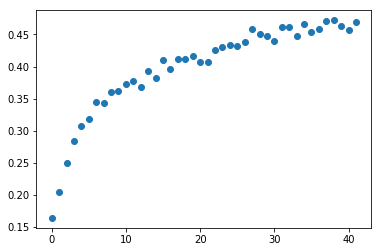

In [7]:
plt.plot(result.history.history['val_categorical_accuracy'], 'o')

In [21]:
result.model.save(result_dir + '/28classes.h5')

In [ ]:
r = report.Reporter2(result_dir + '/28classes.tsv')

r.line(name=result.model.name,
       elapsed=result.elapsed,
       **report.report_epochs(**result._asdict()),
       **report.report_metrics(result.history, result.metrics),
      )

r.close()

In [44]:
pd.read_csv(result_dir + '/28classes.tsv', sep='\t')

,name,elapsed,Epochs,val_binary_accuracy,val_categorical_accuracy
0,C64_16_2pr_C32_4_2pr_C64_32_2pr_F_D28_cat,256.885371,42,0.972862,0.468625


# CLD

In [37]:
model = models.C256_16_16_L128_D(28, 8, 'softmax', 'categorical_crossentropy')

In [38]:
result = Trainer(model).train(*rawset.rnd_split_fraction_by_category(0.5))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


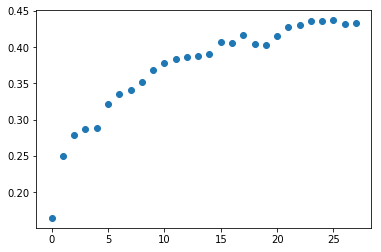

In [39]:
plt.plot(result.history.history['val_categorical_accuracy'], 'o')

In [40]:
result.model.save(result_dir + '/28classes-CLD.h5')

In [41]:
r = report.Reporter2(result_dir + '/28classes-CLD.tsv')

r.line(name=result.model.name,
       elapsed=result.elapsed,
       **report.report_epochs(**result._asdict()),
       **report.report_metrics(result.history, result.metrics),
      )

r.close()

In [42]:
pd.read_csv(result_dir + '/28classes-CLD.tsv', sep='\t')

,name,elapsed,Epochs,val_binary_accuracy,val_categorical_accuracy
0,C256_16_16_L128_D28_cat,205.507304,28,0.971437,0.433875
